### 12.2.2 K-평균 군집화 모델 구현하기

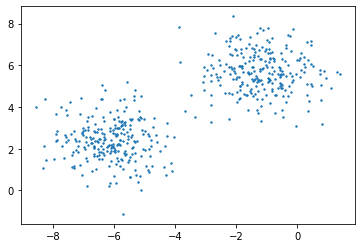

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

X = make_blobs(n_samples=500, centers=2, random_state=1234)[0]
plt.scatter(X[:, 0], X[:, 1], s=2)

이터레이션: 1, 중심: [[-6.1135271   1.58096684]
 [-2.90878169  4.78340178]]

이터레이션: 2, 중심: [[-6.1550979   2.32910441]
 [-1.3419916   5.62012837]]

이터레이션: 3, 중심: [[-6.11472428  2.40975303]
 [-1.18984097  5.67112071]]

이터레이션: 4, 중심: [[-6.10376937  2.41413748]
 [-1.18110522  5.67979891]]

이터레이션: 5, 중심: [[-6.10376937  2.41413748]
 [-1.18110522  5.67979891]]

이터레이션 5에서 학습 종료



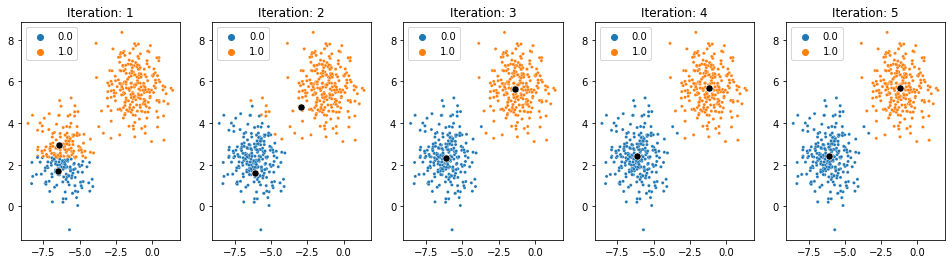

In [2]:
np.random.seed(1234)
cluster = np.zeros(X.shape[0])
centroid_old = X[np.random.randint(X.shape[0], size=2), :]

f = plt.figure(figsize=(20, 4))
for it in range(1, 11):
    for i, row in enumerate(X):
        d = float('inf')
        for ind, centroid in enumerate(centroid_old):
            tmp = np.linalg.norm(centroid - row)
            if d > tmp:
                d = tmp
                cluster[i] = ind
    ax = f.add_subplot(1, 6, it)
    ax.set_title("Iteration: " + str(it))
    sns.scatterplot(X[:, 0], X[:, 1], s=10, hue=cluster)
    sns.scatterplot(centroid_old[:, 0], centroid_old[:, 1], s=50, color='k')

    centroid = pd.DataFrame(X).groupby(by=cluster).mean().values
    print(f'이터레이션: {it}, 중심: {centroid}\n')
    if np.allclose(centroid, centroid_old):
        print(f'이터레이션 {it}에서 학습 종료\n')
        break
    centroid_old = centroid

### [예제 12.1] KMeans 클래스 사용하기

In [3]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

In [4]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(f'샘플별 군집 번호: {kmeans.labels_}')

샘플별 군집 번호: [1 1 1 0 0 0]


### [예제 12.2] RI와 ARI 계산하기

In [5]:
from sklearn import metrics

labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

print(f'RI:{metrics.rand_score(labels_true, labels_pred): .4f}')

RI: 0.6667


In [6]:
print(f'ARI:{metrics.adjusted_rand_score(labels_true, labels_pred): .4f}')

ARI: 0.2424


In [7]:
labels_pred = [1, 1, 0, 0, 3, 3]
print(f'퍼뮤테이션 후 RI:{metrics.rand_score(labels_true, labels_pred): .4f}')
print(f'퍼뮤테이션 후 ARI:{metrics.adjusted_rand_score(labels_true, labels_pred): .4f}')

퍼뮤테이션 후 RI: 0.6667
퍼뮤테이션 후 ARI: 0.2424


In [8]:
print(f'대칭된 입력값에 대한 RI:{metrics.rand_score(labels_pred, labels_true): .4f}')
print(f'대칭된 입력값에 대한 ARI:{metrics.adjusted_rand_score(labels_pred, labels_true): .4f}')

대칭된 입력값에 대한 RI: 0.6667
대칭된 입력값에 대한 ARI: 0.2424


In [9]:
labels_pred = labels_true.copy()
print(f'동일한 입력값의 RI:{metrics.rand_score(labels_true, labels_pred): .4f}')
print(f'동일한 입력값의 ARI:{metrics.adjusted_rand_score(labels_true, labels_pred): .4f}')

동일한 입력값의 RI: 1.0000
동일한 입력값의 ARI: 1.0000


In [10]:
labels_true = [0, 0, 0, 0, 0, 0, 1, 1]
labels_pred = [0, 1, 2, 3, 4, 5, 5, 6]
print(f'거의 랜덤한 입력값의 RI:{metrics.rand_score(labels_true, labels_pred): .4f}')
print(f'거의 랜덤한 입력값의 ARI:{metrics.adjusted_rand_score(labels_true, labels_pred): .4f}')

거의 랜덤한 입력값의 RI: 0.3929
거의 랜덤한 입력값의 ARI:-0.0721


### [예제 12.3] 실루엣 계수

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

kmeans_model = KMeans(n_clusters=3, random_state=1234).fit(X)
labels = kmeans_model.labels_
print(f"X의 군집화 결과의 실루엣 계수:{metrics.silhouette_score(X, labels, metric='euclidean'): .4f}")

X의 군집화 결과의 실루엣 계수: 0.5528


## 12 되새김 문제

### [되새김 문제 12.1] KMeans 클래스 적용하기

#### 문제

In [12]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

#### 풀이

In [13]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

kmeans = KMeans(n_clusters=7, n_init=15, random_state=1234)
kmeans = kmeans.fit(X_train_scaled)
labels = kmeans.predict(X_test_scaled)

X_test['labels'] = labels
X_test['y'] = y_test

X_test.groupby(by='labels').mean()['y'].sort_values()

labels
6     97.285714
5    118.086957
1    139.343750
0    154.928571
2    164.736842
4    186.947368
3    249.555556
Name: y, dtype: float64

### [되새김 문제 12.2] 실루엣 계수로 최적의 군집 수 계산하기

#### 문제

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

X, _ = make_blobs(n_samples=500,
                  n_features=3,
                  centers=6,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  random_state=1234)

#### 풀이

In [15]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    cluster_labels = KMeans(n_clusters=n_clusters,
                            random_state=1234).fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f'군집 개수: {n_clusters}, 실루엣 계수: {silhouette_avg:.4f}')

군집 개수: 2, 실루엣 계수: 0.5266
군집 개수: 3, 실루엣 계수: 0.5306
군집 개수: 4, 실루엣 계수: 0.6192
군집 개수: 5, 실루엣 계수: 0.7304
군집 개수: 6, 실루엣 계수: 0.6538


In [16]:
label = KMeans(n_clusters=5, random_state=1234).fit_predict(X)

df = pd.DataFrame(X, columns=['feature_' + str(i) for i in range(3)])
df['label'] = label

df[df['label'] == 2].mean()

feature_0    1.390601
feature_1    0.071269
feature_2   -9.715374
label        2.000000
dtype: float64